In [2]:
# ### una tecnica robusta que no tenga dependencia de la separacion de datos
import pandas as pd
import numpy as np
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/MachineLearning_Platzi')

In [ ]:
### Gradient Tree Boosting
### Random Forest
### Support Vector Machines
### Extra Random Forest
### Linear Model trained via Stochastic Gradient Descent
### K-Nearest Neighbors
###Decision-Tree 

In [4]:
X = pd.read_csv('df_intermediate.csv')
### eliminar columnas duplicadas
X = X.drop_duplicates(X.columns)
y = X['worldwide_gross']
X = X.drop(['worldwide_gross','usa_gross','gross'], axis=1)
X.shape

(3921, 8)

## Decision Trees

In [3]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=2)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 42)
x_train.head()

,production_budget,opening_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score
3696,1000000.0,346999.0,2001.0,1.85,97.0,1173.0,1000000.0,6.7
2342,17000000.0,13350299.0,2009.0,2.35,132.0,6317.0,17000000.0,6.7
346,100000000.0,29702959.0,2000.0,2.35,130.0,12890.0,100000000.0,6.6
1826,25000000.0,16521468.0,2003.0,2.35,101.0,6867.0,30000000.0,5.8
1840,27000000.0,5582079.0,1996.0,2.35,117.0,16937.0,27000000.0,6.9


In [6]:
model.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [7]:
import graphviz

In [8]:
from sklearn.tree import export_graphviz
treedot = export_graphviz(model,
                          out_file = None,
                          feature_names = X.columns)

In [9]:
treedot

'digraph Tree {\nnode [shape=box] ;\n0 [label="opening_gross <= 40298562.0\\nmse = 2.662697961254899e+16\\nsamples = 2940\\nvalue = 102140914.37"] ;\n1 [label="opening_gross <= 16356503.5\\nmse = 9351114762927456.0\\nsamples = 2760\\nvalue = 72477915.27"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="mse = 5140055108441226.0\\nsamples = 2245\\nvalue = 45753876.47"] ;\n1 -> 2 ;\n3 [label="mse = 1.102348882041246e+16\\nsamples = 515\\nvalue = 188973967.905"] ;\n1 -> 3 ;\n4 [label="opening_gross <= 70284356.0\\nmse = 7.115913129539795e+16\\nsamples = 180\\nvalue = 556973567.228"] ;\n0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n5 [label="mse = 3.5732956146902336e+16\\nsamples = 127\\nvalue = 446595305.48"] ;\n4 -> 5 ;\n6 [label="mse = 5.689852613014618e+16\\nsamples = 53\\nvalue = 821464873.679"] ;\n4 -> 6 ;\n}'

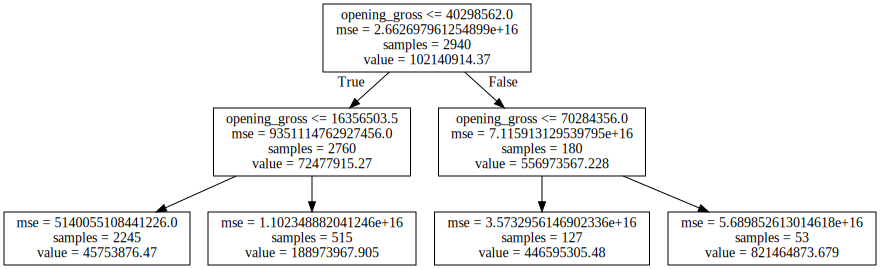

In [10]:
graphviz.Source(treedot)

## Random Forrest / Gradient Boosting 

In [ ]:
### los modelos de arboles son más interpretables
### no necesita el escalamiento de los datos

In [ ]:
### bagging (Boostrap Agregation)
## crear muchos datasets distinto es base al dataset orginal
## en cada arbol estos eligen features diferentes

In [ ]:
### tener modelos bases
### tener modelos que no tenga mucha correlacion
### la prediccion del modelo ensamblado va a ser bueno

In [20]:
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import cross_validate

forest = RandomForestRegressor(200)
results = cross_validate(forest, X, y,return_train_score = True,cv = 5, scoring='r2')

In [21]:
results

{'fit_time': array([3.43485594, 3.54115105, 3.46538544, 3.43429494, 3.45528698]),
 'score_time': array([0.0327034 , 0.03910732, 0.0403614 , 0.03841949, 0.03722572]),
 'test_score': array([ 0.5121049 ,  0.58223069,  0.37448721,  0.39525721, -0.21972774]),
 'train_score': array([0.94647371, 0.96891482, 0.96801697, 0.96897243, 0.96538984])}

In [22]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))
### no estamos regulazirando bien sus parametros porque presenta mayor varianza , pero tiene una ligera mejora en comparacion
### con la regresion Lasso

0.9635535527095511
0.32887045639886753


In [25]:
from sklearn.ensemble import GradientBoostingRegressor

ensemble = GradientBoostingRegressor()
results = cross_validate(ensemble, X, y,return_train_score = True, cv=5, scoring='r2')

In [26]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))
### se puede ver que esta mejor en comparacion al Random Forest. Tiene una ligera menor varianza respecto al random forest

0.8798944528742014
0.32417994859056515


## Optimizacion de Hiperparámetros

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [31]:
from sklearn.model_selection import GridSearchCV

param_test1 = {'n_estimators': range(20,501, 20)}
list(param_test1['n_estimators'])

[20,
 40,
 60,
 80,
 100,
 120,
 140,
 160,
 180,
 200,
 220,
 240,
 260,
 280,
 300,
 320,
 340,
 360,
 380,
 400,
 420,
 440,
 460,
 480,
 500]

In [32]:
#### definir el estimator
estimator = GradientBoostingRegressor(learning_rate=0.1,
                                      min_samples_split = 500,
                                      min_samples_leaf = 50,
                                      max_depth=8,
                                      max_features = 'sqrt',
                                      subsample = 0.8,
                                      random_state = 10)

In [33]:
### instanciar un gridsearch
gsearch1 = GridSearchCV(estimator,
                        param_grid = param_test1,
                        scoring = 'r2',
                        cv = 5)

In [34]:
gsearch1.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=8,
                                                 max_features='sqrt',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=50,
                                                 min_samples_split=500,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
            

In [44]:
 gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([0.04130192, 0.07477956, 0.11203709, 0.14983144, 0.19307733,
         0.23371139, 0.26816373, 0.3102706 , 0.34657049, 0.38301916,
         0.42235112, 0.46620369, 0.49363656, 0.54027052, 0.57574286,
         0.6383862 , 0.65808959, 0.693186  , 0.7365119 , 0.78370218,
         0.81704745, 0.84386921, 0.88647623, 0.93277874, 0.96291261]),
  'mean_score_time': array([0.00164509, 0.00193739, 0.00233603, 0.00289183, 0.00338802,
         0.0034606 , 0.00385871, 0.00426044, 0.00451665, 0.00483727,
         0.00513587, 0.00575056, 0.00582066, 0.0062315 , 0.00660152,
         0.00708804, 0.0073163 , 0.00756264, 0.00794296, 0.00853949,
         0.00867219, 0.00902214, 0.00932083, 0.00967369, 0.01001525]),
  'mean_test_score': array([0.67611533, 0.73837539, 0.75223712, 0.75813364, 0.76137229,
         0.76363508, 0.76548506, 0.76802495, 0.76884831, 0.77099829,
         0.77180513, 0.77153139, 0.77231533, 0.77232322, 0.77277326,
         0.77238887, 0.77252825, 0.77315501,

In [51]:
final_results = cross_validate(gsearch1.best_estimator_,x_train,y_train,return_train_score=True, cv=5)

In [52]:
#### visualizar el train_scores y test_score de mejor estimador encontrado
test_scores = final_results['test_score']
train_scores = final_results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.88157724108931
0.7749651585899444


In [55]:
#### definir el estimator
estimator = GradientBoostingRegressor(learning_rate=0.1,
                                      min_samples_split = 500,
                                      min_samples_leaf = 50,
                                      max_depth=8,
                                      max_features = 'sqrt',
                                      subsample = 0.8,
                                      random_state = 10,
                                      n_estimators = 420)

In [57]:
estimator.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=8,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=50, min_samples_split=500,
                          min_weight_fraction_leaf=0.0, n_estimators=420,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=10, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [58]:
estimator.score(x_test, y_test)

0.7246827153215626